Notebook réalisé par Muthulingam Aginth

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

# I - Extraction des données

In [2]:
dataset = pd.read_csv('EdStatsData.csv')
del(dataset[dataset.columns[-1]])
columns = list(dataset.columns)

# Datframe sur les codes des Pays
df_country = pd.read_csv('EdStatsCountry.csv')
df_country = df_country[['Country Code','Short Name']]

# Dataframe sur les noms des Varibles
df_info = pd.read_csv('EdStatsSeries.csv')
df_info2=df_info[['Series Code','Topic','Indicator Name','Short definition','Long definition']]

In [5]:
print( f'''nb de pays : {len(list(set(dataset['Country Name'])))}''' )
print( f'''nb de variables  {len(list(set(dataset['Indicator Code'])))}''' )

nb de pays : 242
nb de variables  3665


# II - Nettoyage des données

## 1- Element Dupliqués & Valeurs Manquantes

In [10]:
g=dataset.duplicated()
print('Valeur dupliqué = ', len(g[g==True]))

Valeur dupliqué =  0


In [11]:
pays= list(set(dataset['Country Code']))
c=0
for i in pays :
    dataPays= dataset[dataset['Country Code']==i]
    pays_IC= list(set(dataPays['Indicator Code']))
    if len(dataPays['Indicator Code'])-len(pays_IC) > 0:
        c+=1

print((len(pays_IC)-c)/len(pays_IC)*100, '% des pays avec 0 élément dupliqués')
print(c/len(pays_IC)*100, '% des pays avec élément dupliqués')

100.0 % des pays avec 0 élément dupliqués
0.0 % des pays avec élément dupliqués


In [14]:
ValManq = sum(dataset.isnull().sum().values[0:])
nb = dataset.shape[0]*dataset.shape[1]
print(' % Valeur manquante = ', round(ValManq/nb,2)*100,'%')

 % Valeur manquante =  86.0 %


## 2- Tri et choix des Variables 

### a) 1er Tri des Pays

In [39]:
#Création d'une dataframe pour determiné le % de val manquantes pour chaque pays

ls_pays=list(set(dataset['Country Code']))
df_corrigé = pd.DataFrame(data = np.zeros((len(ls_pays),2)),index=ls_pays, columns=['nom Pays','nb NaN'])

for i in ls_pays :
    p=dataset[dataset['Country Code']==i]
    NanVal = ((p.shape[0]*p.shape[1])-sum(p.count()))/(p.shape[0]*p.shape[1])*100
    df_corrigé['nb NaN'][i] = NanVal
    a = dataset[dataset['Country Code']==i]
    df_corrigé['nom Pays'][i] = list(set(a['Country Name']))[0]
    
df_corrigé= df_corrigé.sort_values(by=['nb NaN'])

<AxesSubplot:title={'center':'Comptage des pays en fonction du % de valeurs manquantes'}, xlabel='nb NaN', ylabel='Count'>

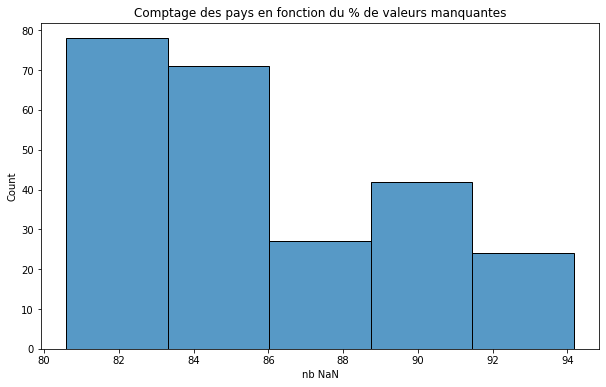

In [41]:
plt.figure(figsize=(10, 6))
plt.title('Comptage des pays en fonction du % de valeurs manquantes')
sns.histplot(df_corrigé['nb NaN'],bins=5)

In [19]:
print(len(df_corrigé[df_corrigé['nb NaN']<86]))
print(len(df_corrigé[df_corrigé['nb NaN']>86]))

148
94


In [20]:
df_corrigé = df_corrigé[df_corrigé['nb NaN']<86]

In [21]:
# On récupère uniquement les pays selectionné dans notre dataset original (= dataset_corrigé1)
 

pays_selecI = list(df_corrigé.index)
ind=[]
for i in pays_selecI :
    ind+=(list(dataset[dataset['Country Code']==i].index))


dataset_corrige1 = dataset.iloc[ind]

In [22]:
dataset_corrige1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
542420,Malta,MLT,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,52.875870,59.594299,62.335602,65.695160,76.585159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542421,Malta,MLT,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,53.385571,58.899639,63.208858,65.549232,77.495888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542422,Malta,MLT,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,1.018860,0.977620,1.027570,0.995690,1.023380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542423,Malta,MLT,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,52.397171,60.247959,61.513031,65.832748,75.725548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542424,Malta,MLT,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### b) Choix des Variables

In [23]:
ls_var=list(set(dataset_corrige1['Indicator Code']))

In [24]:
# Création d'une Dataframe qui indique le % de Valeurs manquantes pour chaque variables


df_var = pd.DataFrame(data = np.zeros((len(ls_var),2)),index=ls_var, columns=['nom Var','nb NaN'])
for i in ls_var :
    p=dataset_corrige1[dataset_corrige1['Indicator Code']==i]
    NanVal = ((p.shape[0]*p.shape[1])-sum(p.count()))/(p.shape[0]*p.shape[1])*100
    df_var['nb NaN'][i] = NanVal
    a = dataset_corrige1[dataset_corrige1['Indicator Code']==i]
    df_var['nom Var'][i] = list(set(a['Indicator Name']))[0]
    
df_var= df_var.sort_values(by=['nb NaN'])

<AxesSubplot:xlabel='nb NaN', ylabel='Count'>

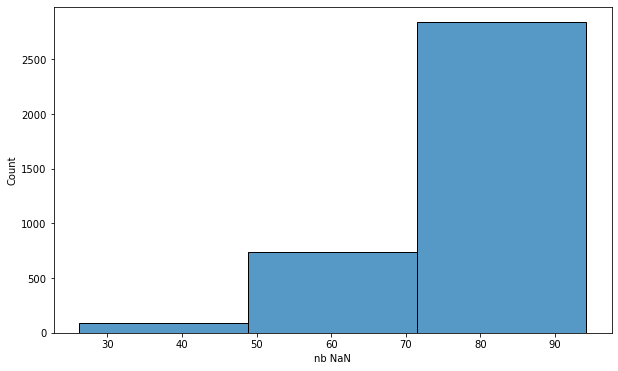

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_var['nb NaN'],bins=3)

In [26]:
df_bestvar= df_var[df_var['nb NaN']<60]
df_bestvar

,nom Var,nb NaN
UIS.THAGE.0,Official entrance age to pre-primary education...,26.194673
SP.POP.TOTL.FE.ZS,"Population, female (% of total)",26.282805
SP.POP.1564.TO.ZS,"Population, ages 15-64 (% of total)",26.282805
SP.POP.0014.TO.ZS,"Population, ages 0-14 (% of total)",26.282805
SP.POP.TOTL.MA.ZS,"Population, male (% of total)",26.282805
...,...,...
UIS.E.1.PR,"Enrolment in primary education, private instit...",59.488837
SE.PRE.TCHR,"Teachers in pre-primary education, both sexes ...",59.576968
UIS.NE.1.G1.F,"New entrants to Grade 1 of primary education, ...",59.625930
UIS.OAEP.1,Percentage of students enrolled in primary edu...,59.655307


In [15]:
#for i in df_bestvar.index:
    #print( f'''{i:20s} = {df_bestvar['nb NaN'][i]} = {df_bestvar['nom Var'][i]} ''' )

Les variables que j'ai décidé de prendre sont :
- Le % des 15-64 ans, H&F (SP.POP.1564.TO.ZS)
- Population en age officiel pour l’enseignement secondaire supérieur, H&F(SP.SEC.UTOT.IN)
- Population en age officiel pour l’enseignement tertiaire, H&F (SP.TER.TOTL.IN) 
- Utilisateur d'Internet (pour 100 people) (IT.NET.USER.P2)

In [27]:
ls_bestvar = ['SP.POP.1564.TO.ZS','SP.SEC.UTOT.IN','SP.TER.TOTL.IN','IT.NET.USER.P2'] 
ls_index = []

for i in ls_bestvar :
    #print(i,list(dataset_corrige1[dataset_corrige1['Indicator Code']==i].index))
    ls_index+=(list(dataset_corrige1[dataset_corrige1['Indicator Code']==i].index))


In [28]:
dataset_corrige2 = dataset_corrige1.loc[ls_index]

### c) Choix des colonnes

In [29]:
# Création d'une Dataframe qui indique le % de Valeurs manquantes pour chaque années

dico_ValManquante=dict()
for i in dataset_corrige2.columns[4:]:
    s=dataset_corrige2[str(i)].isnull().sum()/len(dataset_corrige2[str(i)])*100
    dico_ValManquante[i]=s
    #print( f'''{i} :  {s} % de val manquante''' )

In [30]:
df_ValManquante = pd.DataFrame(dico_ValManquante.items(),columns=['Années','% Val manquantes'])

<AxesSubplot:xlabel='Années', ylabel='% Val manquantes'>

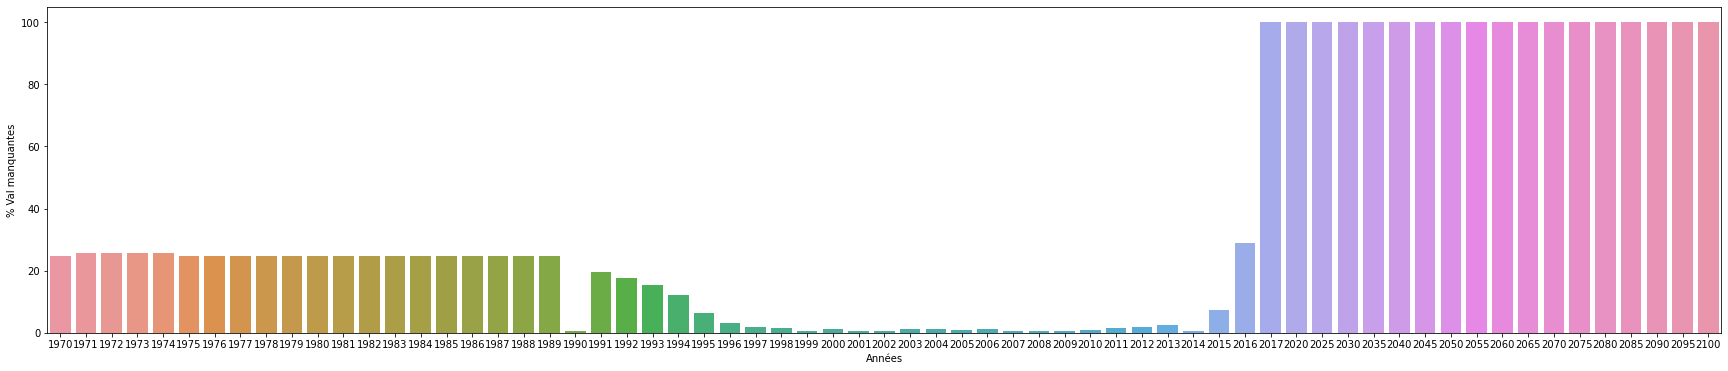

In [31]:
plt.figure(figsize=(30, 6))
sns.barplot(x=df_ValManquante["Années"], y=df_ValManquante["% Val manquantes"])

On remarque qu'à partir de 2017 nous n'avons plus de données on peut donc supprimés ces colonnes. Les données avant 1990 comporte plus de 20% de valeurs manquantes. Par ailleurs celle-ci semblent êtres trop ancienne dans notre cas. Je décide donc de supprimer les colonnes avant 1990

In [32]:
list_années = list(df_ValManquante[df_ValManquante['% Val manquantes'] <= 20]['Années'])
li = ['Country Name','Country Code','Indicator Name','Indicator Code']
dataset_corrige3 = dataset_corrige2[li+list_années]
dataset_corrige3

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
544903,Malta,MLT,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,66.044327,66.098637,66.232375,66.412688,66.595757,66.755104,...,69.090446,69.359579,69.492002,69.470710,69.288890,69.029345,68.665531,68.206669,67.706840,67.219889
281023,Cyprus,CYP,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,64.603047,64.720116,64.862249,65.018913,65.222372,65.491171,...,69.541821,69.872296,70.195079,70.490385,70.746364,70.717394,70.663629,70.563845,70.426075,70.271795
442283,Italy,ITA,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,68.676888,68.674195,68.653620,68.608575,68.537595,68.441509,...,66.146117,65.986625,65.854523,65.699166,65.491092,65.200501,64.882239,64.545138,64.214860,63.910419
200393,Bulgaria,BGR,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,66.509538,66.398632,66.459227,66.636672,66.831212,66.985731,...,69.055427,69.056908,69.017065,68.878089,68.614684,68.154307,67.620370,67.037207,66.456420,65.917026
409298,Hungary,HUN,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,66.130129,66.125437,66.436152,66.920927,67.359759,67.653455,...,68.818654,68.828140,68.890247,68.973291,69.047980,68.924908,68.797177,68.630227,68.389890,68.063247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521805,"Macedonia, FYR",MKD,Internet users (per 100 people),IT.NET.USER.P2,0.000000,NaN,NaN,NaN,NaN,0.040744,...,28.620000,36.300000,46.040000,51.770000,51.900000,56.700000,57.449947,65.240000,68.060000,70.380200
716050,Singapore,SGP,Internet users (per 100 people),IT.NET.USER.P2,0.000000,0.161504,0.471368,0.763278,1.185204,2.873419,...,59.000000,69.900000,69.000000,69.000000,71.000000,71.000000,72.000000,80.902057,79.029236,79.012957
712385,Sierra Leone,SLE,Internet users (per 100 people),IT.NET.USER.P2,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.227669,0.239835,0.250000,0.260000,0.580000,0.900000,2.500000,4.000000,6.057299,6.344422
551125,Mauritania,MRT,Internet users (per 100 people),IT.NET.USER.P2,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.979661,1.433613,1.870000,2.280000,4.000000,4.500000,5.000000,6.200000,10.700000,15.199127


### d) 2eme tri des Pays

In [33]:
# Création d'une dataframe nous indiquant le % de valeurs manquantes pour chaque pays 

dico_pays=dict()
for i in dataset_corrige3['Country Name']:
    dpays= dataset_corrige3[dataset_corrige3['Country Name']==i]
    nbVal = dpays.shape[0]*dpays.shape[1]
    dico_pays[i]= sum(dpays.isnull().sum())/nbVal*100

In [34]:
df_Pays = pd.DataFrame(dico_pays.items(),columns=['Pays','% Val manquantes'])
df_Pays = df_Pays.sort_values(by=['% Val manquantes'],ascending=True)
df_Pays.head()

,Pays,% Val manquantes
90,Germany,0.0
28,Ireland,0.0
25,Norway,0.0
23,Sweden,0.0
22,Switzerland,0.0


In [35]:
ls_bestpays = list(df_Pays[df_Pays['% Val manquantes']==0]['Pays'])
len(df_Pays[df_Pays['% Val manquantes']==0])

21

In [36]:
df_Pays[df_Pays['% Val manquantes']==0]

,Pays,% Val manquantes
90,Germany,0.0
28,Ireland,0.0
25,Norway,0.0
23,Sweden,0.0
22,Switzerland,0.0
51,Poland,0.0
53,Portugal,0.0
54,Austria,0.0
32,Belgium,0.0
15,Finland,0.0


**On obtient 21 pays pour lesquelles toutes les données sont complètes. Pour la suite de l'analyse on va utiliser ces pays**

In [42]:
ls_index = []

for i in ls_bestpays :
    ls_index+=(list(dataset_corrige3[dataset_corrige3['Country Name']==i].index))

dataset_corrigeFinal = dataset_corrige3.loc[ls_index]

In [43]:
ValManqF= sum(dataset_corrigeFinal.isnull().sum().values[0:])
nbF = dataset_corrigeFinal.shape[0]*dataset_corrigeFinal.shape[1]
print(' % Valeur manquante = ', round(ValManqF/nbF,2)*100,'%')

 % Valeur manquante =  0.0 %


# III - Analyse des données 

In [44]:
dataset_corrigeFinal[['moyenne','mediane','variance']]=''

In [45]:
# Calcul de la moyenne, variance et médiane 

for i in dataset_corrigeFinal.index :
    g=dataset_corrigeFinal.loc[i]
    dataset_corrigeFinal['moyenne'][i] = g[list_années].mean()
    dataset_corrigeFinal['mediane'][i] = g[list_années].median()
    dataset_corrigeFinal['variance'][i] = g[list_années].var()

In [46]:
# Creation d'une dataframe contenant les indicateurs statistiques de chaque variables

df_mesure = dataset_corrigeFinal[['Country Name','Indicator Code','moyenne','mediane']].copy()

In [50]:
#Fonction permettant de réaliser nos graphiques 

def plot_var(nom_var,dataset_corrigeFinal,list_années):
    test= dataset_corrigeFinal[dataset_corrigeFinal['Indicator Code']==nom_var][['Country Name']+list_années].copy()
    test.set_index('Country Name', inplace = True)
    plt.figure(figsize=(20, 6))
    title = list(dataset_corrigeFinal[dataset_corrigeFinal['Indicator Code']==nom_var]['Indicator Name'])[0]
    plt.title(str(title))
    sns.lineplot(data=test.T)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return

def barplot_var(nom_var,df_mesure,dataset_corrigeFinal):
    test= df_mesure[df_mesure['Indicator Code']==nom_var].copy()
    plt.figure(figsize=(30, 6))
    title = list(dataset_corrigeFinal[dataset_corrigeFinal['Indicator Code']==nom_var]['Indicator Name'])[0]
    plt.title("moyenne "+title)
    sns.barplot(x=test["Country Name"], y=test["moyenne"])
    return

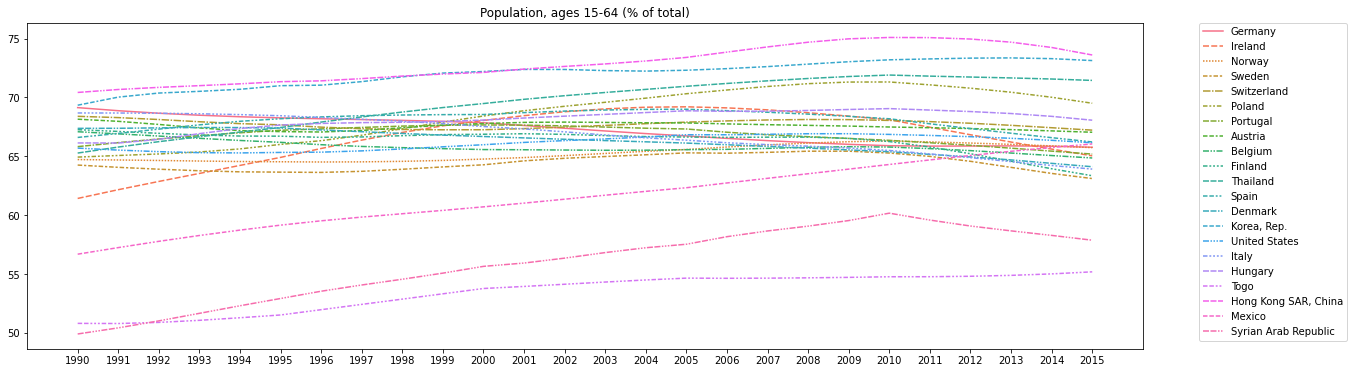

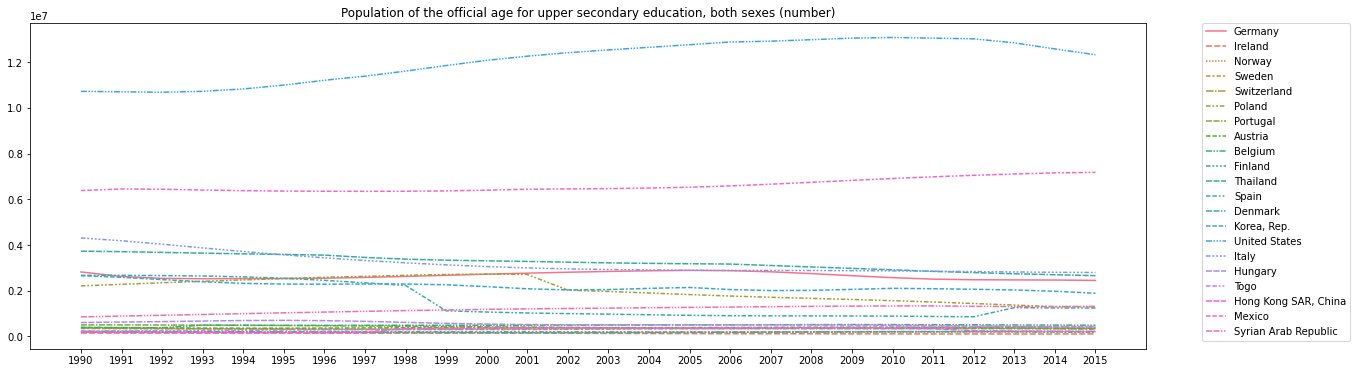

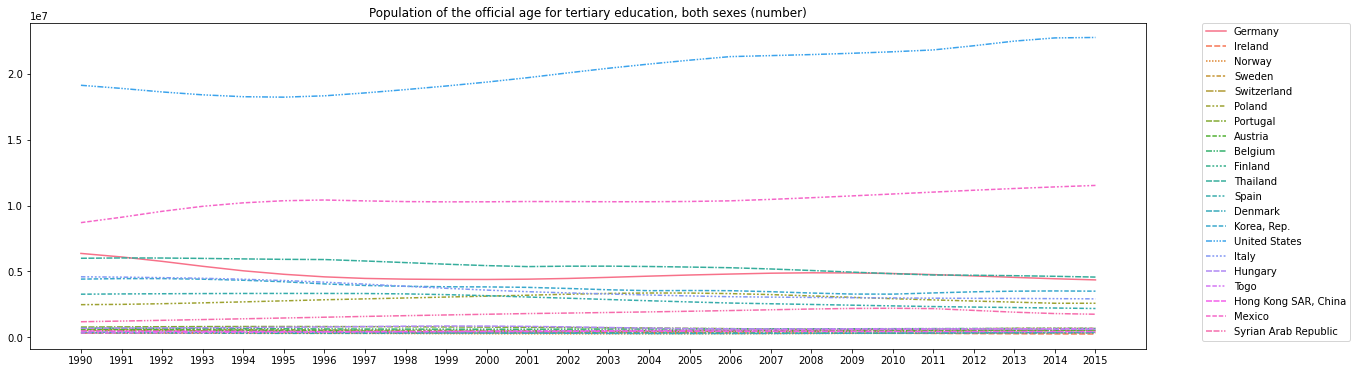

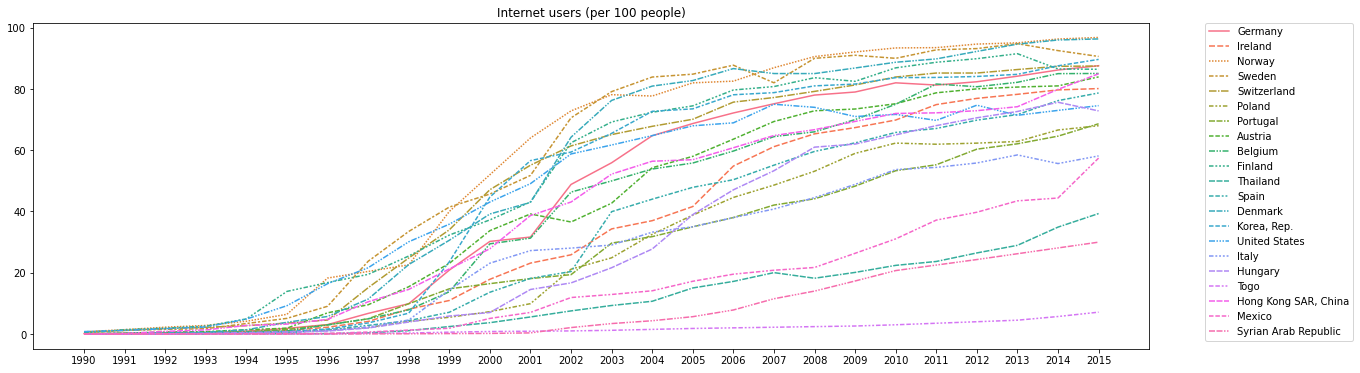

In [51]:
for i in ls_bestvar :
    plot_var(i,dataset_corrigeFinal,list_années)

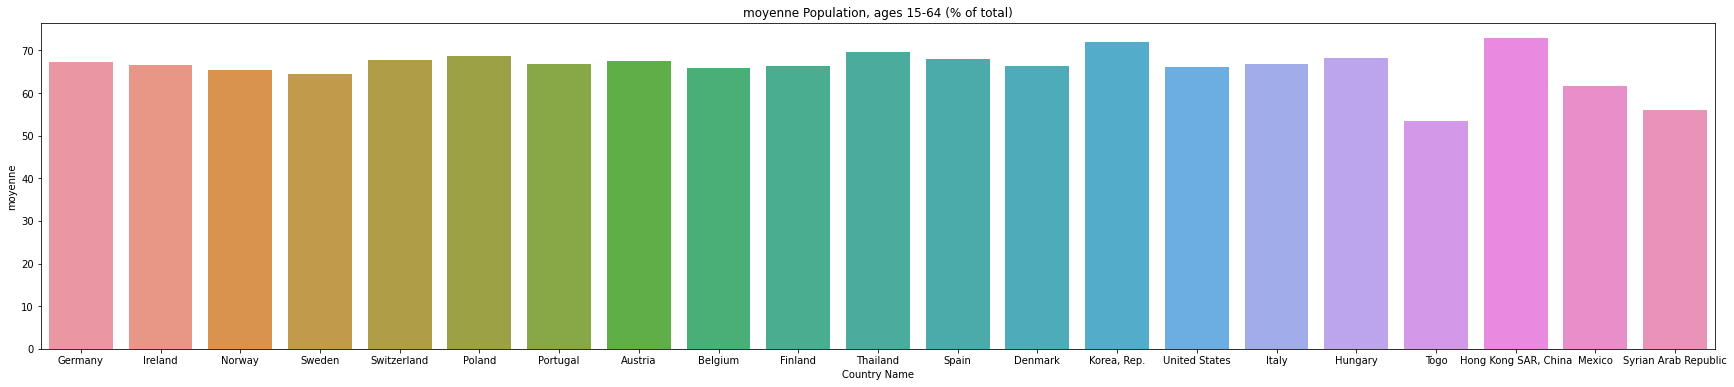

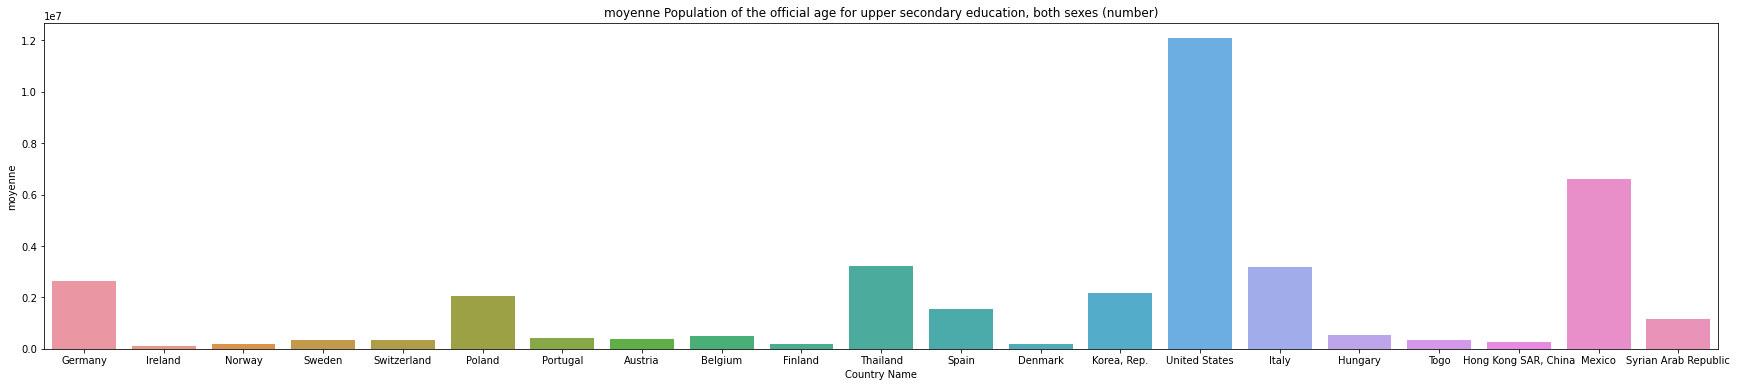

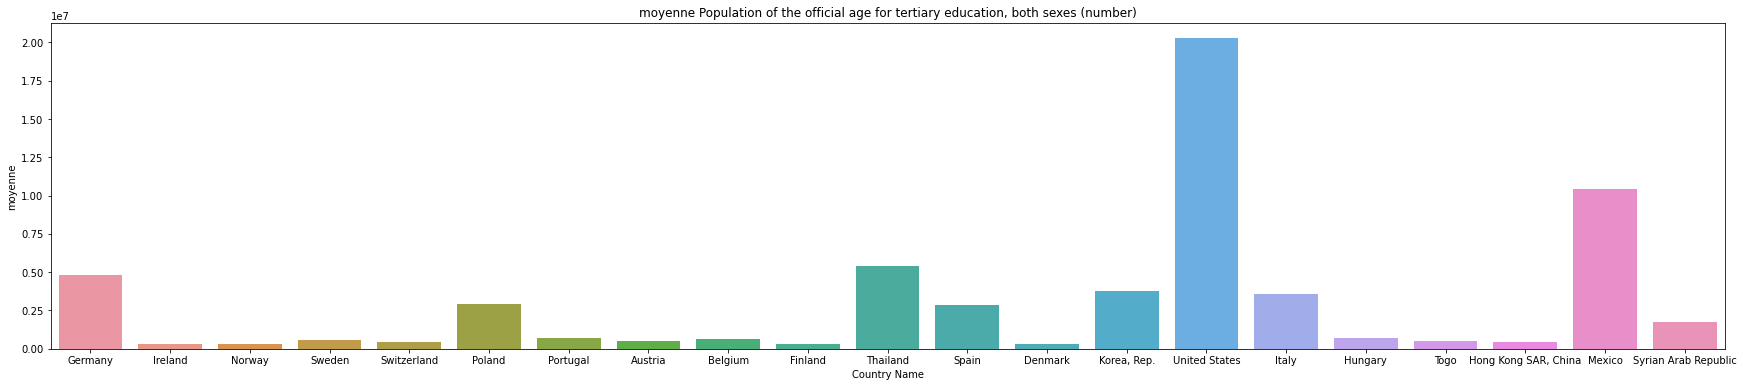

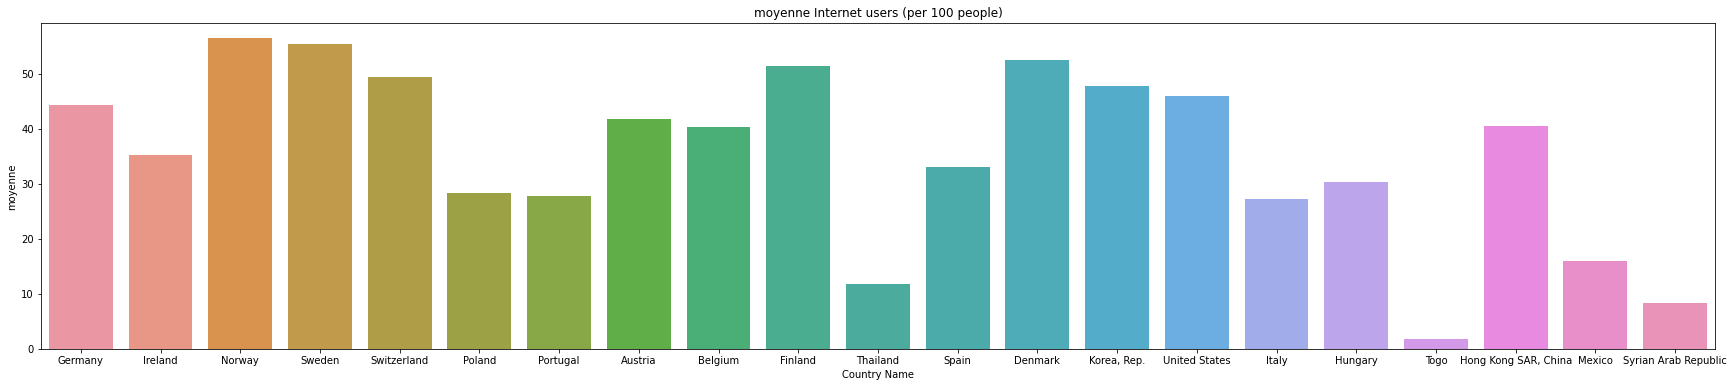

In [49]:
for i in ls_bestvar :
    barplot_var(i,df_mesure,dataset_corrigeFinal)

['SP.POP.1564.TO.ZS', 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN', 'IT.NET.USER.P2']